# **Кластеризация.** Что это и зачем нам надо.


Кластеризация (*clustering*)  задача группировки множества объектов на подмножества (кластеры) таким образом, чтобы объекты из одного кластера были более похожи друг на друга, чем на объекты из других кластеров по какому-либо критерию. Данная задача относится к классу задача обучения без учителя.

# Типы машинного обучения. 

В машинном обученни существует несколько способов обучения модели. Каждый подходит для своей задачи. Так, одни из таких способов это обучение с учителем  (Supervised learning) и обучение без учителя (Unsupervised learning). При  обучении с учителем у нас обязательно должен быть  набор данных и что самое главное ответы к этим данным. Тогда задачей нашего алгоритма будет восстановаить зависимость по этим данным так, что бы ее можно было спрогнозировать ответ для дргуих данных. Supervised learning способен хорошо решать задачи регрессии (стоимость товара через месяц) и классификации (изображен ли человек на фотографии). Линейная регрессия как раз относится к первому типу.  
Но когда у нас есть только исходные данные и правильных ответов нет, а обнаружить зависимость и корреляцию между данными нужно используется обучение без учителя. Обучение без учителя решает задачи кластеризации (распределение клиентов по их платежеспособности), задачи уменьшения размерности (уменьшение количества признаков модели, сведение их до 2 - 4 наиболее значимых), задачи выявления аномалий (поиск выбросов в данных).

# Какие данные есть и чего хотим добиться.

Входные данные:<br>

N - мерная матрица признаков и их значений. 

Задача:<br>
Объеденить объекты на K кластеров так, что бы:<br>
1) Объекты в одном кластере были максимально похожи друг на друга, а<br>
2) Объекты в разных кластерах существенно бы отличались друг от друга.

Выходные данные:<br>

K кластеров данных, объедененных по каким-то признакам.


# Методы кластеризации.


# Метод k-средних. <br>
*(k-means)*

Наиболее популярный и простой алгоритм. 
Главное свойство алгоритма - Количество кластеров k, на которое исходные данные будут разбиты задано заранее.
 
Алгоритм стремится **минимизировать отклонение** точек кластеров от центров этих кластеров.

Формально, необходимо найти такую величину $$ \underset{s}{\mathrm{argmin}}\sum_{i = 1}^{k}\sum_{x \in S_{i}}\left| \left| x-\mu_{i} \right| \right|^{2}$$ где $S$ - кластер, $ μ$ - среднее всех точек кластера $S$, а $k $ - количество кластеров соответственно.
  
Шаги алгоритма:<br>
1) Генерируем или выбираем из уже существующих $k$ случайных точек  - в которых $k_{i}$ - будет центром $i$ - го кластера.<br>
Цикл:<br>
  2)Отнесем каждый объект к ближайшему для него кластеру.<br>
  3)Пересчитываем координаты центров кластеров.  <br>

Повторяем 2 и 3 этапы пока положение центра кластеров не стабилизируется. 


Для определения ближайшего кластера необходимо использовать какую-нибудь метрику. <br>
$ \rho\left( x_{i}, x_{j} \right) $ - метрика, рассточние между любыми парами объектов. Ее тоже необходимо определить заранее. 
Наиболее простой является евклидова метрика, но применимо так же и манхэттенское расстояние и расстояние Махаланобиса.
$$\left| \left| x_{i} - x_{j} \right| \right|^{2} = \sum_{k = 1}^{n}\left( x^{k}_{i} - x^{k}_{j} \right)^{2}$$

Сложность алгоритма: $\mathcal{O}(Inkd)$, где $I$ - количество объектов, $n$ - размерность пространств, $k$ - количество кластеров, $d$.- количество пространств

Наконец-то пишем код

In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import scipy
from sklearn.preprocessing import StandardScaler
%matplotlib inline



Представим наглядно данный алгоритм, используя готовый метод в sklearn.

In [ ]:
from sklearn.datasets import make_blobs
number_of_centers = 4
Blobs, y = make_blobs(centers = number_of_centers, n_samples = 200, random_state = None, cluster_std = 0.7)
#centers - количество групп точек
#n_samples - количество точек
#random_state - сохранять ли данные 
#cluster_std - отклонение от центров кластеров. 
print(Blobs[:4],Blobs[:4])

[[ 3.8986364  -6.44927885]
 [ 4.23717578 -5.97739469]
 [ 8.10863558 -3.37497848]
 [ 4.69240429  5.34435111]] [[ 3.8986364  -6.44927885]
 [ 4.23717578 -5.97739469]
 [ 8.10863558 -3.37497848]
 [ 4.69240429  5.34435111]]


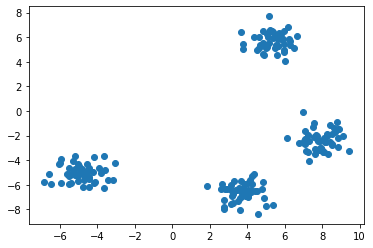

In [ ]:
# Построим полученные данные
plt.scatter(Blobs[:,0],Blobs[:,1]);

[[ 7.89618326 -2.35509059]
 [-4.85818325 -5.07050142]
 [ 5.33647438  5.67540122]
 [ 3.71513268 -6.61204856]]


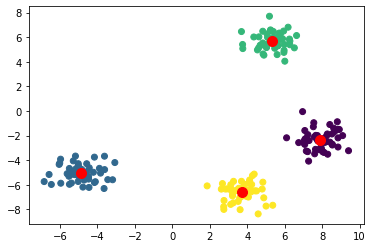

In [ ]:
from sklearn.cluster import KMeans
model = KMeans(number_of_centers)
#model = KMeans(number_of_centers +3)
model.fit(Blobs)


print(model.cluster_centers_) # координаты
#Отобразим полученные кластеры и их центры
plt.scatter(Blobs[:, 0], Blobs[:, 1], c = model.labels_);
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, color = "red"); 

In [ ]:
#Проверим точность 
from sklearn.metrics import accuracy_score
acc=accuracy_score(y, model.labels_)
print("Accuracy score is", acc)
#Заметим, что точность достаточно маленькая, хотя в данном случае центры, как мы видим по графику, 
#находятся точно

Accuracy score is 0.25


Малая точность, связана с особенностями представления данных. Несмотря на то, что центры кластеров могут почти идеально подходить, их метки могут быть переставлены. Выберем случайным образом по одной точке из каждого кластера и сверим их метки с метками исходных данных. Затем мы используем эту метку для всего кластера. По сути, мы переименовываем кластеры, а не повторно кластеризуем данные.

In [ ]:
def find_permutation(n_clusters, real_labels, labels):
    permutation=[]
    for i in range(n_clusters):
        idx = labels == i
        # Выберите наиболее распространенную метку среди точек данных в кластере.
        new_label=scipy.stats.mode(real_labels[idx])[0][0]  
        permutation.append(new_label)
    return permutation

permutation = find_permutation(number_of_centers, y, model.labels_)
#permutation = find_permutation(number_of_centers + 3, y, model.labels_)
print(permutation)

[3, 0, 2, 1]


In [ ]:
# Поменяем обозначения кластеров
new_labels = [ permutation[label] for label in model.labels_]   
print("Accuracy score is", accuracy_score(y, new_labels))

Accuracy score is 1.0


# Почему k-means не самый лучший метод на практике. 
А теперь попробуем использовать метод k - means для не таких удобных для него данных. 

[[ 7.89618326 -2.35509059]
 [-4.85818325 -5.07050142]
 [ 5.33647438  5.67540122]
 [ 3.71513268 -6.61204856]]


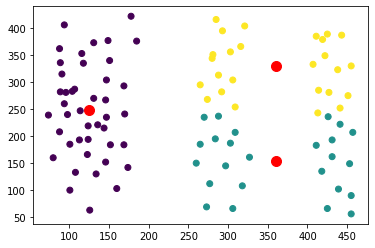

In [ ]:
v_stripes = pd.DataFrame([(126, 63), (101, 100), (80, 160), (88, 208), (89, 282), (88, 362), (94, 406), (149, 377), (147, 304), (147, 235), (146, 152), (160, 103), (174, 142), (169, 184), (170, 241), (169, 293), (185, 376), (178, 422), (116, 353), (124, 194), (273, 69), (277, 112), (260, 150), (265, 185), (270, 235), (265, 295), (281, 351), (285, 416), (321, 404), (316, 366), (306, 304), (309, 254), (309, 207), (327, 161), (318, 108), (306, 66), (425, 66), (418, 135), (411, 183), (413, 243), (414, 285), (407, 333), (411, 385), (443, 387), (455, 330), (441, 252), (457, 207), (453, 149), (455, 90), (455, 56), (439, 102), (431, 162), (431, 193), (426, 236), (427, 281), (438, 323), (419, 379), (425, 389), (422, 349), (451, 275), (441, 222), (297, 145), (284, 195), (288, 237), (292, 282), (288, 313), (303, 356), (293, 395), (274, 268), (280, 344), (303, 187), (114, 247), (131, 270), (144, 215), (124, 219), (98, 240), (96, 281), (146, 267), (136, 221), (123, 166), (101, 185), (152, 184), (104, 283), (74, 239), (107, 287), (118, 335), (89, 336), (91, 315), (151, 340), (131, 373), (108, 133), (134, 130), (94, 260), (113, 193)])

number_of_centers2 = 3
from sklearn.cluster import KMeans
model2 = KMeans(number_of_centers2)
#model2 = KMeans(number_of_centers2 + 3)
model2.fit(v_stripes)
print(model.cluster_centers_)
#Отобразим полученные кластеры и их центры
plt.scatter(v_stripes[0] , v_stripes[1], c = model2.labels_);
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], s = 100, color = "red"); 


[[-0.20884345  0.57602116]
 [ 1.19791204 -0.07100486]]


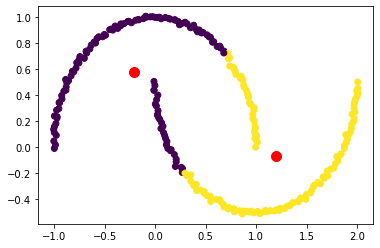

In [ ]:
from sklearn.datasets import make_moons
Moons, y = make_moons(n_samples = 250, noise = 0.01, random_state = 0)

from sklearn.cluster import KMeans
model = KMeans(2)
model.fit(Moons)
print(model.cluster_centers_)
#Отобразим полученные кластеры и их центры
plt.scatter(Moons[:, 0], Moons[:, 1], c = model.labels_);
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s = 100, color = "red"); 

# Иерархическая кластеризация<br>
*Hierarchical clustering* / *Алгомеративная кластеризация*.

Алгоритм стремится **объеденить наиболее похожие точки в 1** усредненную.

Так же как и в k-means необходимо обозначить количество кластеров и метрику для нахождения расстояния между объектами.

Алгоритм:<br>
1) Каждый объект - независимый кластер<br>
Цикл:<br>
2) В соответствии с заданной метрикой, ищем 2 кластера наиболее близких друг к другу.<br>
3)Объединяем выбранные элементы в кластер.<br>
4)Пересчитать для всех Кластеров расстояние между ними<br>


Возникает проблема: как считать расстояние от кластера из $N_{i}$ элементов.<br><br>
Для этого используется формула Ланса-Уильямса. 
$$ R\left( W,S \right) = \alpha_{U} \cdot R\left( U,S \right) +  \alpha_{V} \cdot R\left( V,S \right) +   \beta \cdot R\left( U,V \right) + \gamma \cdot \left| R\left( U,S \right ) - R\left( V,S \right ) \right| $$ 
Которая позволяет посчитать расстояние от получившегося кластера $W = U \cup V$ до кластера $S$.


Существует несколько вариаций использования этой формулы.Чаще применяют Расстояние дальнего соседа или Росстояние Уорда.



![](https://drive.google.com/uc?export=view&id=1i2ZDyFiyv7NcaSkdJfWcrjydxDVEX1C3)


<br>
Сложность алгоритма $\mathcal{O}(N^{2})$

In [ ]:
from sklearn.cluster import AgglomerativeClustering
dots = np.array([[1, 2], [1, 4], [4, 2],
              [1, 0], [4, 4], [4, 0]])
clustering = AgglomerativeClustering(n_clusters=2).fit(dots)
clustering.labels_# какая точка к какому классу относится

array([1, 1, 0, 1, 0, 0])

Немного про **определение оптимального количества кластеров** используя дендрограммы.

Дендрограмма - древовидная диаграмма, содержащая n количество уровней, представляющих собой каждый шаг процесса последовательного укрупнения кластеров.


In [ ]:

url = 'https://raw.githubusercontent.com/DennisKimt/datasets/main/Mall_Customers.csv'
people = pd.read_csv(url)
print(people.head())
#берем 3, 4 колонки
newData = people.iloc[:, [3, 4]].values 


   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


Text(0, 0.5, 'Euclidean distances')

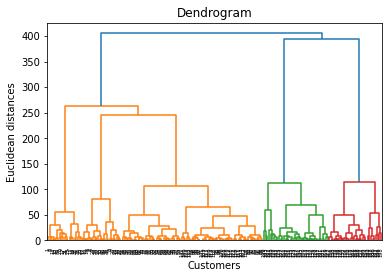

In [ ]:
import scipy.cluster.hierarchy as sch 
dendrogram = sch.dendrogram(sch.linkage(newData, method = 'ward')) 
plt.title('Dendrogram') 
plt.xlabel('Customers') 
plt.ylabel('Euclidean distances') 


Реализация. Sklearn

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
#n_cluster - 5 основываясь на диаграмме выше.
#affinity - метрика
#linkage - метод для Ланса - Уильямса

Agg_hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(newData)


Text(0, 0.5, 'Spending Score (1-100)')

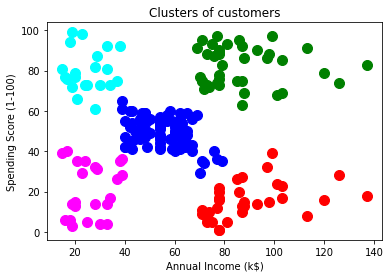

In [ ]:
plt.scatter(newData[y_hc == 0, 0], newData[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1') 
plt.scatter(newData[y_hc == 1, 0], newData[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2') 
plt.scatter(newData[y_hc == 2, 0], newData[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3') 
plt.scatter(newData[y_hc == 3, 0], newData[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')  
plt.scatter(newData[y_hc == 4, 0], newData[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')


Text(0.5, 1.0, 'Number of clusters = 2')

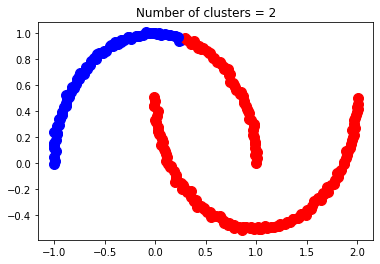

In [ ]:
from sklearn.cluster import AgglomerativeClustering 
#n_cluster - 2, две полуокружности
#affinity - метрика
#linkage - метод для Ланса - Уильямса
n_cluster = 2
Agg_hc = AgglomerativeClustering(n_clusters = n_cluster, affinity = 'euclidean', linkage = 'ward')
y_hc = Agg_hc.fit_predict(Moons)
len(Moons)
for i in range (len(Moons)):
  if(y_hc[i]):
    plt.scatter(Moons[i][0], Moons[i][1], s = 100, c = 'blue')
  else:
    plt.scatter(Moons[i][0], Moons[i][1], s = 100, c = 'red')
plt.title(f'Number of clusters = {n_cluster}' )


# DBSCAN<br>
*Density-based spatial clustering of applications with noise* /
*Основанная на плотности пространственная кластеризация для приложений с шумами*.

Данный алгоритм позволяет выделять кластеры неоднозначных форм. Так же данный алгоритм сам определяет наиболее оптимальное количество кластеров и находит выбросы. Единственный параметр, который необходимо указать - максимальное расстояние между соседями.<br>

Алгоритм стремится объеденить в кластер данный **основываясь на их плотности относительно друг друга**.

# Формальное определение.<br>
Введём несколько определений. Пусть задана некоторая симметричная функция расстояния (метрика) $\rho(x, y)$ и константы $\epsilon$ и $m$. Тогда
 

1.    Назовём область $E(x)$, для которой $\forall y: \rho(x, y) \leq \epsilon$, $\epsilon$-окрестностью объекта $x$.
2.    Корневым объектом  степени $m$ называется объект, $\epsilon$-окрестность которого содержит не менее $m$ объектов: $|E(x)| \geq m$.
3.  Объект $p$ непосредственно плотно-достижим из объекта $q$, если $p \in E(q)$ и $q$ — корневой объект.
4. Объект $p$ плотно-достижим из объекта $q$, если $\exists p_1, p_2 \dots p_n, p_1 = q, p_n = p$, такие что $\forall i \in 1 \dots n-1: p_{i+1}$ непосредственно плотно-достижим из $p_i$

<br>
Сложность алгоритма $\mathcal{O}(N^{2})$

![](https://drive.google.com/uc?export=view&id=1GHvuOcAyi66o0kVHirChf8esn9X6JTkp)



Если присмотреться, можно заметить, что алгоритм является небольшой модификацией bfs(поиска в ширину). И действительно: Выберем какой-нибудь корневой объект $p$ из датасета, пометим его и поместим всех его непосредственно плотно-достижимых соседей в список обхода. Теперь для каждой $q$ из списка: пометим эту точку, и, если она тоже корневая, добавим всех её соседей в список обхода. Тривиально доказывается, что кластеры помеченных точек, сформированные в ходе этого алгоритма максимальны (т.е. их нельзя расширить ещё одной точкой, чтобы удовлетворялись условия) и связны в смысле плотно-достижимости. Отсюда следует, что если мы обошли не все точки, можно перезапустить обход из какого-нибудь другого корневого объекта, и новый кластер не поглотит предыдущий.



In [ ]:
#нормализуем
Moons_norm = StandardScaler().fit_transform(Moons)

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(Moons_norm)
#db = DBSCAN(eps=0.3, min_samples=10).fit(df)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Количество кластеров без учета шумов
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)


Estimated number of clusters: 2
Estimated number of noise points: 0


Text(0.5, 1.0, 'Estimated number of clusters: 2')

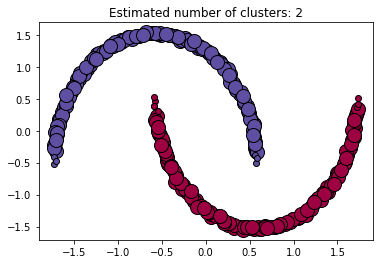

In [ ]:
unique_labels = set(labels)
#Меняем палитру цветов
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
#unique_labels - наши кластеры, -1 - шумы
for k, col in zip(unique_labels, colors):
    if k == -1:
        #Цвет шумов - черный
        col = [0, 0, 0, 1]

    class_member_mask = labels == k
    #Данная точка входит в класс и является корневой
    xy = Moons_norm[class_member_mask & core_samples_mask]
    plt.plot( xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor="k", markersize=14)
    #Данная точка входит в класс и является граничной
    xy = Moons_norm[class_member_mask & ~core_samples_mask]
    plt.plot( xy[:, 0], xy[:, 1], "o", markerfacecolor = tuple(col), markeredgecolor="k", markersize=6)

plt.title(f'Estimated number of clusters: {n_clusters_}')


На самом деле задача классификации является довольно популярной. Существует еще довольно большое количество алгоритмов, к примеру те, что изображены нижне.

![](https://drive.google.com/uc?export=view&id=1q0_laSjg-2Rryocy9iyLgkkAqchjtfRk)

